In [2]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import metrics

#importing datasets
data_set= pd.read_csv('/content/drive/MyDrive/User_Data1.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [3]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
x_test

array([[-0.40900504,  0.58959108],
       [ 0.68747655, -1.1728876 ],
       [-0.53083632, -0.79101722],
       [ 2.02762071, -0.93789044],
       [-1.38365533,  0.64834037]])

In [5]:
y_test

array([0, 0, 0, 1, 0])

In [6]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [8]:
y_pred

array([0, 0, 0, 0, 0])

In [9]:
#Now we will create the Confusion Matrix for our K-NN model to see the accuracy of the cla
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [10]:
cm

array([[4, 0],
       [1, 0]])

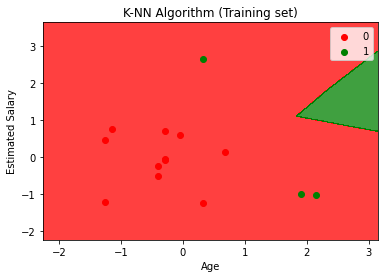

In [11]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [12]:
"""
As we can see the graph is showing the red point and green points. 
The green points are for Purchased(1) and Red Points for not Purchased(0) variable.
The graph is showing an irregular boundary instead of showing any straight line or any curve because it is a K-NN algorithm, 
"""

'\nAs we can see the graph is showing the red point and green points. \nThe green points are for Purchased(1) and Red Points for not Purchased(0) variable.\nThe graph is showing an irregular boundary instead of showing any straight line or any curve because it is a K-NN algorithm, \n'

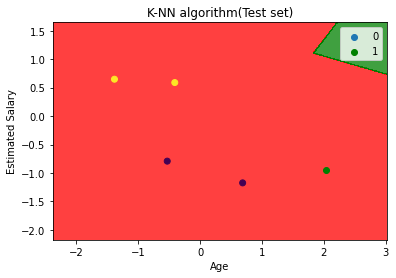

In [13]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()

In [14]:
accuracy = metrics.accuracy_score(y_test,y_pred)
report = metrics.classification_report(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Confusion matrix:
[[4 0]
 [1 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
